In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [19]:
df = pd.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
# Exclude non-numeric or ID-like columns
features = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours'])

# Ensure all columns are numeric (e.g., already encoded)
numeric_data = features.select_dtypes(include=['int64', 'float64'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try different cluster counts and calculate silhouette scores
sil_scores = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(scaled_data)
    score = silhouette_score(scaled_data, model.labels_, metric='euclidean')
    sil_scores.append(score)

silhouette_df = pd.DataFrame({'K': list(K), 'Silhouette Score': sil_scores})
display(silhouette_df)

,K,Silhouette Score
0,2,0.153804
1,3,0.131952
2,4,0.096174
3,5,0.102998
4,6,0.078036
5,7,0.079054
6,8,0.064734
7,9,0.062376
8,10,0.060609


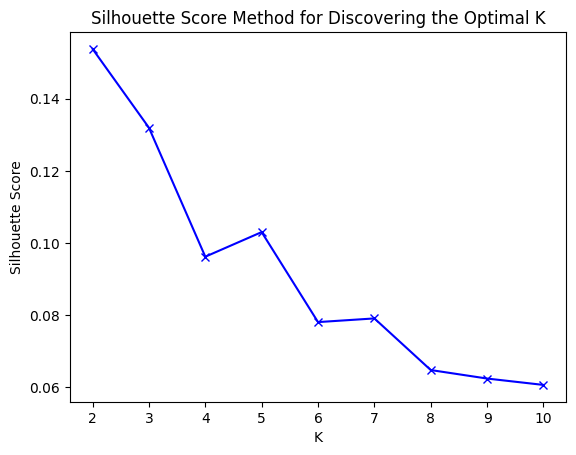

In [22]:
# Plot the silhouette scores to find the optimal k
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(list(K), sil_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [23]:
# Select the best number of clusters
best_k = list(K)[sil_scores.index(max(sil_scores))]
print(f"Best number of clusters: {best_k} with silhouette score: {max(sil_scores):.4f}")

# Fit KMeans with the best k and assign cluster labels
final_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(scaled_data)

Best number of clusters: 2 with silhouette score: 0.1538


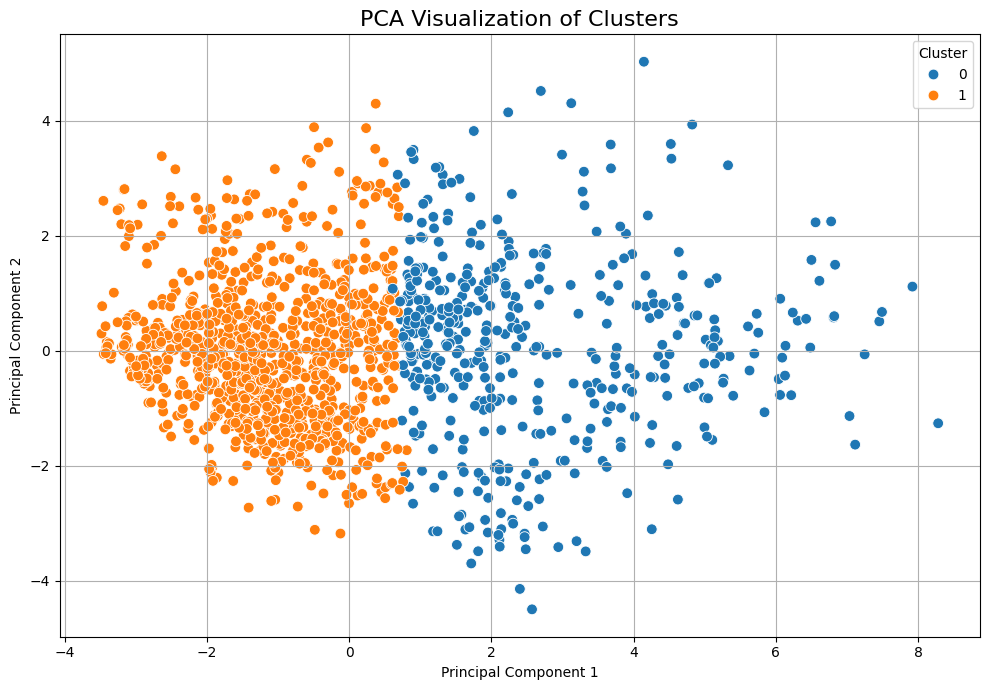

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Show mean values of features by cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)

# Transpose for easier comparison (features as rows)
cluster_profile.T


Cluster,0,1
Age,42.873638,34.222552
DailyRate,797.494553,804.751731
DistanceFromHome,9.095861,9.236400
Education,3.069717,2.841741
EmployeeCount,1.000000,1.000000
EmployeeNumber,1002.984749,1034.799209
EnvironmentSatisfaction,2.782135,2.694362
HourlyRate,65.830065,65.918892
JobInvolvement,2.734205,2.727992
JobLevel,3.204793,1.545994


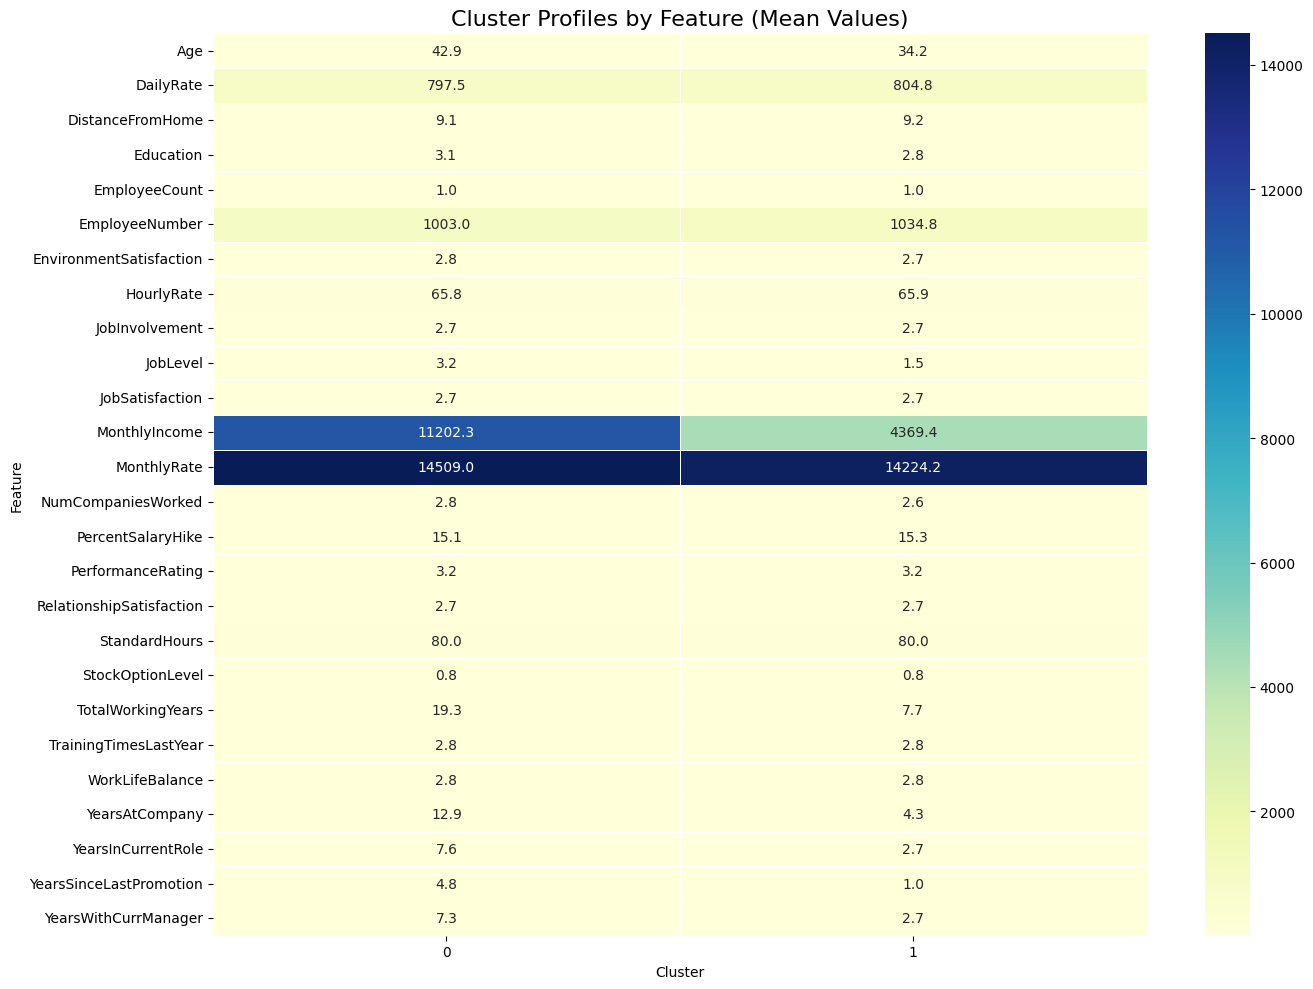

In [26]:
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_profile.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Cluster Profiles by Feature (Mean Values)", fontsize=16)
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
